# 머신러닝 진행

## 1. 데이터 불러오기

In [1]:
import pandas as pd

customers = pd.read_csv('./data/olist_customers_dataset.csv')
geolocation = pd.read_csv('./data/olist_geolocation_dataset.csv')
orders = pd.read_csv('./data/olist_orders_dataset.csv')
order_items = pd.read_csv('./data/olist_order_items_dataset.csv')
order_payments = pd.read_csv('./data/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('./data/olist_order_reviews_dataset.csv')
products = pd.read_csv('./data/olist_products_dataset.csv')
sellers = pd.read_csv('./data/olist_sellers_dataset.csv')
product_cat_name = pd.read_csv('./data/product_category_name_translation.csv')

## 2. 데이터 프레임 합치기

In [2]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [3]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [4]:
order_items.order_id.unique

<bound method Series.unique of 0         00010242fe8c5a6d1ba2dd792cb16214
1         00018f77f2f0320c557190d7a144bdd3
2         000229ec398224ef6ca0657da4fc703e
3         00024acbcdf0a6daa1e931b038114c75
4         00042b26cf59d7ce69dfabb4e55b4fd9
                        ...               
112645    fffc94f6ce00a00581880bf54a75a037
112646    fffcd46ef2263f404302a634eb57f7eb
112647    fffce4705a9662cd70adb13d4a31832d
112648    fffe18544ffabc95dfada21779c9644f
112649    fffe41c64501cc87c801fd61db3f6244
Name: order_id, Length: 112650, dtype: object>

In [5]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [7]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [8]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [9]:
from functools import reduce

df1 = reduce(lambda x,y: pd.merge(x,y, on='order_id', how='inner'), [order_items, orders, order_payments, order_reviews])
df1

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,1,credit_card,2,72.19,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,1,credit_card,3,259.83,7b07bacd811c4117b742569b04ce3580,4,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,1,credit_card,5,216.87,0c5b33dea94867d1ac402749e5438e8b,5,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,1,credit_card,2,25.78,f4028d019cb58564807486a6aaf33817,4,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,1,credit_card,3,218.04,940144190dcba6351888cafa43f3a3a5,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,...,1,boleto,1,343.40,9185f849f32d82e216a4e025e0c50f5c,5,NaN,NaN,2018-05-11 00:00:00,2018-05-14 12:53:47
117325,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,...,1,boleto,1,386.53,be803f6a93d64719fd685c1cc610918a,5,NaN,NaN,2018-07-24 00:00:00,2018-07-25 09:25:29
117326,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,...,1,credit_card,3,116.85,dbdd81cd59a1a9f94a10a990b4d48dce,5,NaN,NaN,2017-10-29 00:00:00,2017-10-29 21:33:52
117327,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,...,1,credit_card,3,64.71,fba117c9ac40d41ca7be54741f471303,5,NaN,Recebi o produto antes do prazo e corretamente.,2017-08-17 00:00:00,2017-08-18 12:24:05


In [10]:
df2 = reduce(lambda x,y: pd.merge(x,y, on='customer_id', how='inner'), [df1, customers])
df2

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,7b07bacd811c4117b742569b04ce3580,4,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,0c5b33dea94867d1ac402749e5438e8b,5,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,f4028d019cb58564807486a6aaf33817,4,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,940144190dcba6351888cafa43f3a3a5,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,...,9185f849f32d82e216a4e025e0c50f5c,5,NaN,NaN,2018-05-11 00:00:00,2018-05-14 12:53:47,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA
117325,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,...,be803f6a93d64719fd685c1cc610918a,5,NaN,NaN,2018-07-24 00:00:00,2018-07-25 09:25:29,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR
117326,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,...,dbdd81cd59a1a9f94a10a990b4d48dce,5,NaN,NaN,2017-10-29 00:00:00,2017-10-29 21:33:52,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP
117327,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,...,fba117c9ac40d41ca7be54741f471303,5,NaN,Recebi o produto antes do prazo e corretamente.,2017-08-17 00:00:00,2017-08-18 12:24:05,eb803377c9315b564bdedad672039306,13289,vinhedo,SP


In [11]:
df3 = reduce(lambda x,y: pd.merge(x,y, on='product_id', how='inner'), [df2, products])
df3

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,campos dos goytacazes,RJ,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,...,jatai,GO,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,...,belo horizonte,MG,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,...,sao jose dos pinhais,PR,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,...,conselheiro lafaiete,MG,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,050309b91cc5e04e68841938e7984aaf,delivered,2018-07-13 20:04:05,...,conceicao de macabu,RJ,ferramentas_jardim,37.0,653.0,1.0,6700.0,35.0,12.0,22.0
117325,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,11e0f43ab4e2d2c48348dd9332c0ef80,delivered,2018-08-18 10:00:59,...,sao jose dos pinhais,PR,moveis_decoracao,30.0,308.0,1.0,2300.0,37.0,30.0,20.0
117326,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.0,20.91,dec8952e97ef6124259c56914fb3569c,delivered,2017-06-01 16:53:03,...,volta redonda,RJ,relogios_presentes,33.0,658.0,3.0,400.0,19.0,9.0,15.0
117327,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,a5201e1a6d71a8d21e869151bd5b4085,delivered,2017-12-18 16:33:07,...,tenente ananias,RN,esporte_lazer,32.0,280.0,2.0,2700.0,60.0,15.0,15.0


In [12]:
df4 = reduce(lambda x,y: pd.merge(x,y, on='seller_id', how='inner'), [df3, sellers])
df4

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,...,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,...,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,...,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,...,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,fecc4ea5a3e06ce3192ae2f05b7a8439,2,70adb75b3b2e86cffbb697c90867c3f3,4e2627090e6e5b9fabba883a37897683,2018-01-21 22:09:08,39.9,14.10,ec43686dd7b2f48ea65475606fdfc85d,processing,2018-01-14 21:52:31,...,31.0,437.0,2.0,100.0,65.0,11.0,11.0,31565,belo horizonte,MG
117325,fecc4ea5a3e06ce3192ae2f05b7a8439,3,70adb75b3b2e86cffbb697c90867c3f3,4e2627090e6e5b9fabba883a37897683,2018-01-21 22:09:08,39.9,14.10,ec43686dd7b2f48ea65475606fdfc85d,processing,2018-01-14 21:52:31,...,31.0,437.0,2.0,100.0,65.0,11.0,11.0,31565,belo horizonte,MG
117326,fecc4ea5a3e06ce3192ae2f05b7a8439,4,70adb75b3b2e86cffbb697c90867c3f3,4e2627090e6e5b9fabba883a37897683,2018-01-21 22:09:08,39.9,14.10,ec43686dd7b2f48ea65475606fdfc85d,processing,2018-01-14 21:52:31,...,31.0,437.0,2.0,100.0,65.0,11.0,11.0,31565,belo horizonte,MG
117327,ff701a7c869ad21de22a6994237c8a00,1,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,2018-04-18 20:10:33,27.9,14.44,8f6d16c31abb30b7b4650272cb0014a3,delivered,2018-04-12 19:47:40,...,28.0,242.0,1.0,2000.0,19.0,38.0,19.0,3124,sao paulo,SP


In [13]:
df5 = reduce(lambda x,y: pd.merge(x,y, on='product_category_name', how='inner'), [df4, product_cat_name])
df5

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.90,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,...,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.90,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,...,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.90,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,...,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.90,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,...,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,2c12150c742ae2fa48bc703964c16c5f,1,2b54fb9a4acf707537eb53eb2458c241,ef728fa1f17436c91ed1ccd03dcf9631,2018-08-02 17:50:12,57.90,19.60,ab0cf72dfe0538a63a57d6905ccb7b57,delivered,2018-07-28 17:55:27,...,923.0,5.0,1000.0,25.0,25.0,25.0,17201,jau,SP,arts_and_craftmanship
115605,2ef4a11b6e24fdfbb43b92cb5f95edff,1,9c313adb4b38a55b092f53f83f78be9e,ef728fa1f17436c91ed1ccd03dcf9631,2018-07-30 09:17:39,19.00,12.86,ee1cfdc92e449920e25d3ca4ab4da4f6,delivered,2018-07-23 18:35:14,...,660.0,3.0,500.0,16.0,6.0,16.0,17201,jau,SP,arts_and_craftmanship
115606,2ef4a11b6e24fdfbb43b92cb5f95edff,2,eacb104882d39ffb53140b1d1860a7c3,ef728fa1f17436c91ed1ccd03dcf9631,2018-07-30 09:17:39,39.90,12.87,ee1cfdc92e449920e25d3ca4ab4da4f6,delivered,2018-07-23 18:35:14,...,942.0,5.0,500.0,21.0,7.0,14.0,17201,jau,SP,arts_and_craftmanship
115607,9f7ba492c273ffac8f90a623b8eadd3b,1,5aa0d6ed4e6c0995d62090cd82cde89a,ef728fa1f17436c91ed1ccd03dcf9631,2018-08-28 03:24:24,11.90,12.79,c61336d6c835632048f973d2f2db598d,delivered,2018-08-23 12:31:37,...,654.0,3.0,200.0,16.0,6.0,16.0,17201,jau,SP,arts_and_craftmanship


In [14]:
df5.isnull().sum()

order_id                              0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1195
order_delivered_customer_date      2400
order_estimated_delivery_date         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
review_id                             0
review_score                          0
review_comment_title             101808
review_comment_message            66703
review_creation_date                  0
review_answer_timestamp               0
customer_unique_id                    0


In [15]:
df = df5.copy()

In [16]:
df.drop(['review_comment_title', 'review_comment_message'], axis=1, inplace=True)
df.isnull().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date     1195
order_delivered_customer_date    2400
order_estimated_delivery_date       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
review_id                           0
review_score                        0
review_creation_date                0
review_answer_timestamp             0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_cate

In [17]:
len(df), df.order_id.nunique()

(115609, 96516)

In [18]:
df.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,...,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115609 non-null  object 
 1   order_item_id                  115609 non-null  int64  
 2   product_id                     115609 non-null  object 
 3   seller_id                      115609 non-null  object 
 4   shipping_limit_date            115609 non-null  object 
 5   price                          115609 non-null  float64
 6   freight_value                  115609 non-null  float64
 7   customer_id                    115609 non-null  object 
 8   order_status                   115609 non-null  object 
 9   order_purchase_timestamp       115609 non-null  object 
 10  order_approved_at              115595 non-null  object 
 11  order_delivered_carrier_date   114414 non-null  object 
 12  order_delivered_customer_date 

## 3. 데이터 전처리

- payment_type, customer_city, customer_state, seller_city, seller_state, product_category_name_english 변수 labelencoding 진행

In [27]:
from sklearn.preprocessing import LabelEncoder

# payment_type
le_payment = LabelEncoder()
df['payment_type'] = le_payment.fit_transform(df.payment_type)
df['payment_type'].unique(), le_payment.classes_

(array([1, 0, 3, 2], dtype=int64), array([0, 1, 2, 3], dtype=int64))

In [28]:
# customer_city
le_city = LabelEncoder()
df['customer_city'] = le_city.fit_transform(df.customer_city)
df['customer_city'].unique(), le_city.classes_

(array([ 737, 1939,  451, ..., 3245, 3944, 3585]),
 array(['abadia dos dourados', 'abadiania', 'abaete', ..., 'zacarias',
        'ze doca', 'zortea'], dtype=object))

In [29]:
# customer_state
le_state = LabelEncoder()
df['customer_state'] = le_state.fit_transform(df.customer_state)
df['customer_state'].unique(), le_state.classes_

(array([18,  8, 10, 17,  4, 15, 22, 25,  5,  1, 23, 13,  6, 19,  9,  7, 12,
        14, 11, 16, 26,  2,  0, 20, 24, 21,  3]),
 array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
        'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
        'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object))

In [32]:
# seller_city
le_city2 = LabelEncoder()
df['seller_city'] = le_city2.fit_transform(df.seller_city)
df['seller_city'].unique(), le_city2.classes_

(array([599, 511, 225, 124, 219, 276, 325, 531, 477,  80, 322, 502,  63,
        346,  24, 257, 238, 143, 444, 217,  57, 436, 145, 416, 483, 105,
        264, 552, 263, 113, 423, 397,  47, 460, 107, 439, 364, 525, 100,
        196, 377, 488,  68, 575,  79, 405, 434, 585,  27, 465,  14, 282,
         19, 540, 158, 432, 498, 529, 300, 371, 431,  82, 290, 236, 337,
        485, 461,  38, 253, 551,  54, 157, 114, 161,  58, 471,  21, 294,
        305, 350,  84, 302, 503, 168, 501, 321,  37,  88, 574, 479, 223,
         35, 389, 206, 115, 248,   9, 137,  78, 449, 307, 490, 261, 505,
        535, 198, 339, 398, 103, 189, 480, 476, 546, 177, 174, 601, 111,
        547, 193, 603, 442, 244,  91, 363, 344, 160, 340, 387, 400, 195,
        247, 146, 379, 150, 156, 418, 359, 388, 274,  52, 162, 557, 216,
        570, 138, 572, 573, 336, 452, 512, 437, 561, 278, 563, 303, 201,
        562, 299, 283, 543, 334, 393, 586, 357, 446,  71,  69, 183, 147,
         28, 117, 148, 222, 272, 243, 404, 596, 550

In [35]:
# seller_state
df['seller_state'] = le_state.transform(df.seller_state)
df['seller_state'].unique(), le_state.classes_

(array([25, 17, 23,  6, 10, 22, 18,  8, 15,  4, 12,  7, 11,  5, 19, 24, 14,
        13,  2,  9,  0, 16, 20]),
 array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
        'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
        'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object))

In [36]:
# product_category_name_english
le_category = LabelEncoder()
df['product_category_name_english'] = le_category.fit_transform(df.product_category_name_english)
df['product_category_name_english'].unique(), le_category.classes_

(array([20, 69, 60, 39,  7, 59, 15, 49, 66, 42, 65, 68,  4, 43,  6, 21, 10,
        25, 16, 36, 28, 47, 46, 62, 13, 17, 26, 34, 23, 30,  5, 57, 40, 70,
        19, 53, 54, 22, 56, 44, 48,  0,  1, 63, 64, 51, 50, 45,  8, 18,  2,
        55, 24, 12, 58, 32, 41, 67, 37, 11, 61, 29, 27, 14, 38, 33, 31,  9,
        52, 35,  3]),
 array(['agro_industry_and_commerce', 'air_conditioning', 'art',
        'arts_and_craftmanship', 'audio', 'auto', 'baby', 'bed_bath_table',
        'books_general_interest', 'books_imported', 'books_technical',
        'cds_dvds_musicals', 'christmas_supplies', 'cine_photo',
        'computers', 'computers_accessories', 'consoles_games',
        'construction_tools_construction', 'construction_tools_lights',
        'construction_tools_safety', 'cool_stuff',
        'costruction_tools_garden', 'costruction_tools_tools',
        'diapers_and_hygiene', 'drinks', 'dvds_blu_ray', 'electronics',
        'fashio_female_clothing', 'fashion_bags_accessories',
        'fash

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115609 non-null  object 
 1   order_item_id                  115609 non-null  int64  
 2   product_id                     115609 non-null  object 
 3   seller_id                      115609 non-null  object 
 4   shipping_limit_date            115609 non-null  object 
 5   price                          115609 non-null  float64
 6   freight_value                  115609 non-null  float64
 7   customer_id                    115609 non-null  object 
 8   order_status                   115609 non-null  object 
 9   order_purchase_timestamp       115609 non-null  object 
 10  order_approved_at              115595 non-null  object 
 11  order_delivered_carrier_date   114414 non-null  object 
 12  order_delivered_customer_date 

- date 관련 컬럼 타입 변경 (object→date)

In [74]:
df.shipping_limit_date = pd.to_datetime(df.shipping_limit_date)
df.order_purchase_timestamp = pd.to_datetime(df.order_purchase_timestamp)

In [75]:
df.order_approved_at = pd.to_datetime(df.order_approved_at)
df.order_delivered_carrier_date = pd.to_datetime(df.order_delivered_carrier_date)
df.order_delivered_customer_date = pd.to_datetime(df.order_delivered_customer_date)
df.order_estimated_delivery_date = pd.to_datetime(df.order_estimated_delivery_date)

- product 설명 관련 컬럼 삭제

In [79]:
df = df.drop(['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], axis=1)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115609 non-null  object        
 1   order_item_id                  115609 non-null  int64         
 2   product_id                     115609 non-null  object        
 3   seller_id                      115609 non-null  object        
 4   shipping_limit_date            115609 non-null  datetime64[ns]
 5   price                          115609 non-null  float64       
 6   freight_value                  115609 non-null  float64       
 7   customer_id                    115609 non-null  object        
 8   order_status                   115609 non-null  object        
 9   order_purchase_timestamp       115609 non-null  datetime64[ns]
 10  order_approved_at              115595 non-null  datetime64[ns]
 11  

- review 관련 컬럼 삭제

In [82]:
df = df.drop(['review_id', 'review_creation_date', 'review_answer_timestamp'], axis=1)

- id는 object 타입으로 변환

In [85]:
df.order_item_id = df.order_item_id.astype('object')

- 년, 월, 일, 시간 컬럼 생성

In [100]:
df['order_purchase_year'] = [y.year for y in df.order_purchase_timestamp]
df['order_purchase_month'] = [y.month for y in df.order_purchase_timestamp]
df['order_purchase_day'] = [y.day for y in df.order_purchase_timestamp]
df['order_purchase_hour'] = [y.hour for y in df.order_purchase_timestamp]

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115609 non-null  object        
 1   order_item_id                  115609 non-null  object        
 2   product_id                     115609 non-null  object        
 3   seller_id                      115609 non-null  object        
 4   shipping_limit_date            115609 non-null  datetime64[ns]
 5   price                          115609 non-null  float64       
 6   freight_value                  115609 non-null  float64       
 7   customer_id                    115609 non-null  object        
 8   order_status                   115609 non-null  object        
 9   order_purchase_timestamp       115609 non-null  datetime64[ns]
 10  order_approved_at              115595 non-null  datetime64[ns]
 11  

In [98]:
df.order_purchase_timestamp[0].year, df.order_purchase_timestamp[0]

(2017, Timestamp('2017-09-13 08:59:02'))

## 4. 'payment_value'와 데이터 간 상관관계 확인

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [58]:
pd.DataFrame(df.corr().payment_value).sort_values(['payment_value'], ascending=False)

C:\Users\SeolRyung\AppData\Local\Temp\ipykernel_9664\919675592.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.DataFrame(df.corr().payment_value).sort_values(['payment_value'], ascending=False)


,payment_value
payment_value,1.000000
price,0.740246
freight_value,0.373991
product_weight_g,0.307096
payment_installments,0.274698
order_item_id,0.256610
product_height_cm,0.217323
product_description_lenght,0.156160
product_width_cm,0.148232
product_length_cm,0.140026


C:\Users\SeolRyung\AppData\Local\Temp\ipykernel_9664\4022745963.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pd.DataFrame(df.corr().payment_value).sort_values(['payment_value'], ascending=False), annot=True, fmt=".2f")


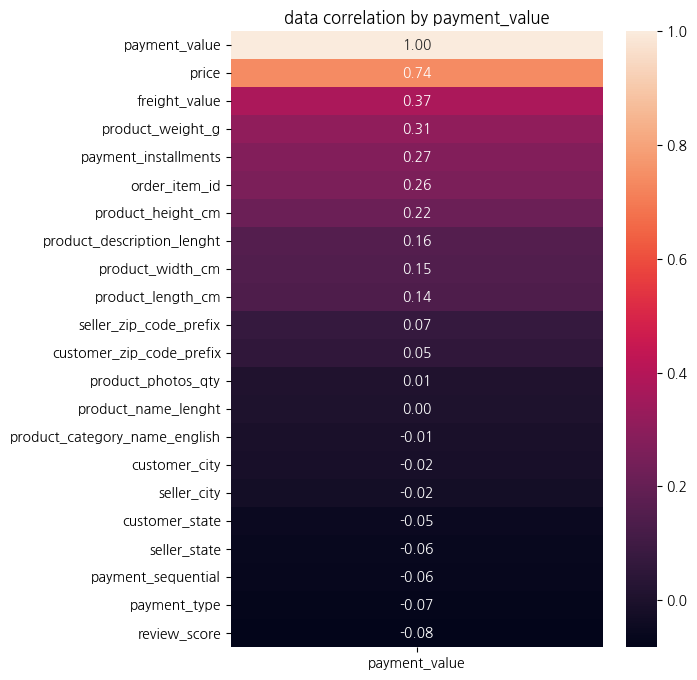

In [66]:
f, ax = plt.subplots(figsize=(6, 8))
sns.heatmap(pd.DataFrame(df.corr().payment_value).sort_values(['payment_value'], ascending=False), annot=True, fmt=".2f")

plt.title('data correlation by payment_value');

In [104]:
pd.DataFrame(df.corr().payment_value).sort_values(['payment_value'], ascending=False)

C:\Users\SeolRyung\AppData\Local\Temp\ipykernel_9664\919675592.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.DataFrame(df.corr().payment_value).sort_values(['payment_value'], ascending=False)


,payment_value
payment_value,1.000000
price,0.740246
freight_value,0.373991
payment_installments,0.274698
seller_zip_code_prefix,0.071112
customer_zip_code_prefix,0.052696
order_purchase_year,0.005764
order_purchase_month,0.003991
order_purchase_day,-0.001986
order_purchase_hour,-0.003751


C:\Users\SeolRyung\AppData\Local\Temp\ipykernel_9664\2850714387.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pd.DataFrame(df.corr().payment_value).sort_values(['payment_value'], ascending=False), annot=True, fmt=".2f")


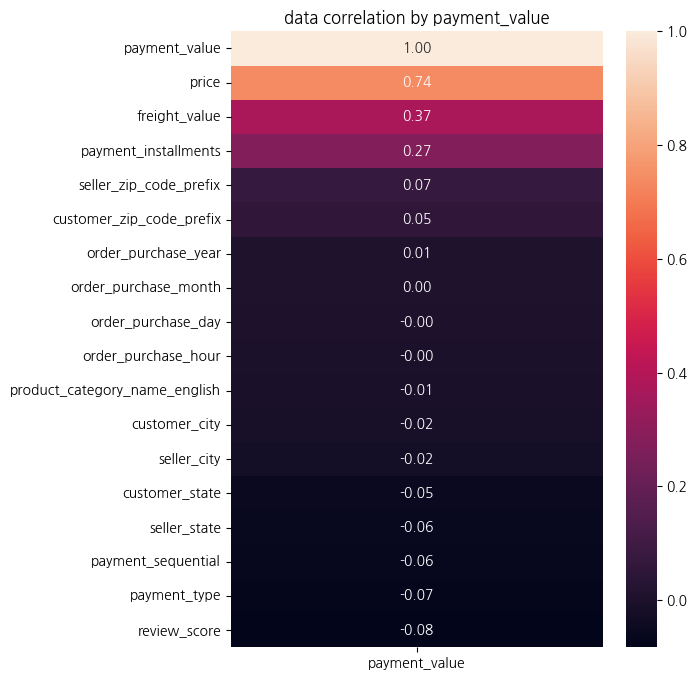

In [103]:
f, ax = plt.subplots(figsize=(6, 8))
sns.heatmap(pd.DataFrame(df.corr().payment_value).sort_values(['payment_value'], ascending=False), annot=True, fmt=".2f")
plt.title('data correlation by payment_value');

## 5. 데이터 변수 선정
- order_purchase_timestamp
- order_purchase_year
- order_purchase_month
- order_purchase_hour
- seller_zip_code_prefix
- customer_zip_code_prefix
- price
- product_category_name_english
- payment_installments
- payment_value

In [109]:
df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_score',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'product_category_name', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'product_category_name_english',
       'order_purchase_year', 'order_purchase_month', 'order_purchase_day',
       'order_purchase_hour'],
      dtype='object')

In [111]:
df_purchase = df[['order_purchase_timestamp', 'order_purchase_year', 'order_purchase_month', 'order_purchase_hour', 'seller_zip_code_prefix', 'customer_zip_code_prefix', 'price', 'product_category_name_english', 'payment_installments', 'payment_value']]

In [112]:
df_purchase

,order_purchase_timestamp,order_purchase_year,order_purchase_month,order_purchase_hour,seller_zip_code_prefix,customer_zip_code_prefix,price,product_category_name_english,payment_installments,payment_value
0,2017-09-13 08:59:02,2017,9,8,27277,28013,58.90,20,2,72.19
1,2017-06-28 11:52:20,2017,6,11,27277,75800,55.90,20,1,73.86
2,2018-05-18 10:25:53,2018,5,10,27277,30720,64.90,20,2,83.23
3,2017-08-01 18:38:42,2017,8,18,27277,83070,58.90,20,3,75.07
4,2017-08-10 21:48:40,2017,8,21,27277,36400,58.90,20,4,72.19
...,...,...,...,...,...,...,...,...,...,...
115604,2018-07-28 17:55:27,2018,7,17,17201,35930,57.90,3,7,77.50
115605,2018-07-23 18:35:14,2018,7,18,17201,9951,19.00,3,1,84.63
115606,2018-07-23 18:35:14,2018,7,18,17201,9951,39.90,3,1,84.63
115607,2018-08-23 12:31:37,2018,8,12,17201,12305,11.90,3,1,24.69


In [121]:
df_purchase.isnull().sum()

order_purchase_timestamp         0
order_purchase_year              0
order_purchase_month             0
order_purchase_hour              0
seller_zip_code_prefix           0
customer_zip_code_prefix         0
price                            0
product_category_name_english    0
payment_installments             0
payment_value                    0
dtype: int64

## 6. 데이터 회귀 모델 선정

In [113]:
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle
import numpy as np
from sklearn.model_selection import train_test_split

In [128]:
X = df_purchase.iloc[:,1:-1]
y = df_purchase.payment_value

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=128)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((92487, 8), (23122, 8), (92487,), (23122,))

In [129]:
reg = LazyRegressor(verbose=0, predictions=True)

models, predictions = reg.fit(x_train, x_test, y_train, y_test)

 90%|██████████████████████████████████████████████████████████████████████████▏       | 38/42 [14:30<04:58, 74.70s/it]

[00:15:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [14:33<00:00, 20.79s/it]


### 모델 선택
- RandomForestRegressor
- ExtraTreeRegressor
- BaggingRegressor
- DecisionTreeRegressor
- LGBMRegressor

In [130]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.92,0.92,68.28,18.18
RandomForestRegressor,0.91,0.91,75.63,44.99
BaggingRegressor,0.89,0.89,80.75,4.37
ExtraTreeRegressor,0.81,0.81,107.32,0.20
DecisionTreeRegressor,0.79,0.79,114.47,0.53
KNeighborsRegressor,0.75,0.75,122.85,1.23
LGBMRegressor,0.75,0.75,123.92,0.43
HistGradientBoostingRegressor,0.75,0.75,124.66,0.75
GradientBoostingRegressor,0.67,0.67,141.51,7.27


## 7. 스케일러 적용
- Standardscaler → lazypredict를 수행할 때 내부에서 자동으로 적용
```
ExtraTreesRegressor rmse 68.28
RandomForestRegressor rmse 75.63
ExtraTreeRegressor rmse 107.32	
BaggingRegressor rmse 80.75	
DecisionTreeRegressor rmse 114.47
LGBMRegressor rmse 123.92
```
- Normalizer
- Robustscaler

In [132]:
from sklearn.ensemble import *
from sklearn.tree import *
from lightgbm import LGBMRegressor

etsr = ExtraTreesRegressor()
rfr = RandomForestRegressor()
etr = ExtraTreeRegressor()
bgr = BaggingRegressor()
dtr = DecisionTreeRegressor()
lgbmr = LGBMRegressor()

In [141]:
from sklearn.metrics import *

def rmse(y, y_pred):
    return mean_squared_error(y, y_pred, squared=False)

def model_diff(x_train, x_test, y_train, y_test):
    etsr.fit(x_train, y_train)
    y_pred1 = etsr.predict(x_test)

    rfr.fit(x_train, y_train)
    y_pred2 = rfr.predict(x_test)
    
    etr.fit(x_train, y_train)
    y_pred3 = etr.predict(x_test)
    
    bgr.fit(x_train, y_train)
    y_pred4 = bgr.predict(x_test)
    
    dtr.fit(x_train, y_train)
    y_pred5 = dtr.predict(x_test)
    
    lgbmr.fit(x_train, y_train)
    y_pred6 = lgbmr.predict(x_test)
    
    print('ExtraTreesRegressor rmse : ', rmse(y_test, y_pred1))
    print('RandomForestRegressor rmse : ', rmse(y_test, y_pred2))
    print('ExtraTreeRegressor rmse : ', rmse(y_test, y_pred3))    
    print('BaggingRegressor rmse : ', rmse(y_test, y_pred4))    
    print('DecisionTreeRegressor rmse : ', rmse(y_test, y_pred5))
    print('LGBMRegressor rmse : ', rmse(y_test, y_pred6))    

In [142]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()
x_train_norm = norm.fit_transform(x_train)
x_test_norm = norm.transform(x_test)

model_diff(x_train_norm, x_test_norm, y_train, y_test)

ExtraTreesRegressor rmse :  68.28113837468246
RandomForestRegressor rmse :  73.4704062653143
ExtraTreeRegressor rmse :  146.4214136108972
BaggingRegressor rmse :  80.68256845269474
DecisionTreeRegressor rmse :  106.31734962891073
LGBMRegressor rmse :  128.21805933141468


In [143]:
from sklearn.preprocessing import RobustScaler

robust = RobustScaler()
x_train_robust = robust.fit_transform(x_train)
x_test_robust = robust.transform(x_test)

model_diff(x_train_robust, x_test_robust, y_train, y_test)

ExtraTreesRegressor rmse :  67.70581201117012
RandomForestRegressor rmse :  74.49921673536207
ExtraTreeRegressor rmse :  116.35495912306162
BaggingRegressor rmse :  80.28132311506721
DecisionTreeRegressor rmse :  113.76666595202175
LGBMRegressor rmse :  122.86562097769558


#### 스케일러 결과
- scaler : robustscaler 선정
- model : ExtraTreesRegressor, RandomForestRegressor, BaggingRegressor 세 개로 다시 진행

## 8. 하이퍼파라미터 조정
- grid search 사용

In [145]:
from sklearn.model_selection import GridSearchCV

# 모델을 할당할 리스트 생성
estimators = []

# estimators 모델 추가
estimators.append(etsr)
estimators.append(rfr)
estimators.append(bgr)

# 파라미터 할당 리스트 생ㅅ어
params = []

# 파라미터 추가
params_rfr = {'n_estimators' : [90, 100, 110, 120],
            'min_samples_split' : [1,2,3,4]}
params.append(params_rfr)

params_etsr = {'n_estimators' : [50,60,70,80,90,100,110,120,130,140,150]}
params.append(params_etsr)

params_bgr = {'bootstrap':[True,False],
             'n_estimators':[60,70,80,90,100,110,120,130,140,150]}
params.append(params_bgr)

In [146]:
from tqdm.auto import tqdm

def gridSearchCV(models, params):
    
    best_models=[]
    
    for i in tqdm(range(0,len(models))):
        model_grid = GridSearchCV(models[i], params[i], n_jobs = -1, verbose=1, cv=5)
        model_grid.fit(x_train_robust, y_train)
        best_models.append(model_grid.best_estimator_)
    return best_models

best_model_list = gridSearchCV(estimators, params)

  0%|          | 0/3 [00:00<?, ?it/s]

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 11 candidates, totalling 55 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


- 최적의 모델 확인

In [147]:
best_model_list

[ExtraTreesRegressor(min_samples_split=1, n_estimators=110),
 RandomForestRegressor(n_estimators=140),
 BaggingRegressor(n_estimators=150)]

In [156]:
print('ExtraTreesRegressor(min_samples_split=1, n_estimators=110) rmse : ',rmse(y_test, best_model_list[0].predict(x_test_robust)))

ExtraTreesRegressor(min_samples_split=1, n_estimators=110) rmse :  67.72898631137949


In [157]:
print('RandomForestRegressor(n_estimators=140) rmse : ',rmse(y_test, best_model_list[1].predict(x_test_robust)))

RandomForestRegressor(n_estimators=140) rmse :  74.14772068579857


In [158]:
print('BaggingRegressor(n_estimators=150) rmse : ',rmse(y_test, best_model_list[2].predict(x_test_robust)))

BaggingRegressor(n_estimators=150) rmse :  74.44733465828473


## 9. 결과값 확인

In [176]:
result = pd.DataFrame(columns=['실제값', '예측값'])
result['실제값'] = y_test.round()
result['예측값'] = best_model_list[0].predict(x_test_robust).round()
result

,실제값,예측값
15951,54.00,75.00
58163,115.00,124.00
12243,26.00,37.00
108040,37.00,63.00
90396,23.00,24.00
...,...,...
89931,100.00,119.00
69878,110.00,61.00
113296,89.00,125.00
101265,57.00,72.00
